In [1]:
# For data manipulation
import numpy as np
import pandas as pd
import yfinance as yf
import pyfolio as pf
from hmmlearn import hmm                          
from sklearn.utils import check_random_state
import Indicators as Indicators
# For data visualization
import matplotlib.pyplot as plt
import HMM_model as HMM_model
import Plotting as Plotting
import get_regime_dates as get_regime_dates
# For ignoring warnings
import warnings
warnings.filterwarnings('ignore')

C:\Users\HI\anaconda3\envs\qi-nlp\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
C:\Users\HI\anaconda3\envs\qi-nlp\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


In [2]:
# Download the AXisbank data from 2003 to 2013
data = yf.download('^NSEI', start='2003-12-01', end='2025-01-16', auto_adjust=True)

# Compute the log returns
data['returns'] = np.log(data['Close']/data['Close'].shift(1))

# Print the data
data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Volume,returns
Date,,,,,,
2007-09-17,4518.450195,4549.049805,4482.850098,4494.649902,0,NaN
2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195,0,0.011404
2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098,0,0.040130
2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805,0,0.003207
2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805,0,0.018780
...,...,...,...,...,...,...
2024-04-24,22421.550781,22476.449219,22384.000000,22402.400391,235900,0.001537
2024-04-25,22316.900391,22625.949219,22305.250000,22570.349609,475000,0.007469
2024-04-26,22620.400391,22620.400391,22385.550781,22419.949219,329900,-0.006686


In [3]:
# Compute the DC indicators
data = Indicators.directional_change_events(data, theta=0.03)

# Drop NaN values
data.dropna(inplace=True)

# Present the data
data

,Open,High,Low,Close,Volume,returns,Event,pt,ph,pl,ph_index,pl_index,TMV,T,R
Date,,,,,,,,,,,,,,,
2007-10-17,5658.899902,5658.899902,5107.299805,5559.299805,0,-0.019373,-1.0,0.0,5559.299805,4494.649902,21,0,7.895683,21,-4.484764
2007-10-18,5551.100098,5736.799805,5269.649902,5351.000000,0,-0.038189,0.0,0.0,5559.299805,5351.000000,21,22,7.895683,21,-4.484764
2007-10-19,5360.350098,5390.850098,5101.750000,5215.299805,0,-0.025687,0.0,0.0,5559.299805,5215.299805,21,23,7.895683,21,-4.484764
2007-10-22,5202.750000,5247.399902,5070.899902,5184.000000,0,-0.006020,1.0,0.0,5559.299805,5184.000000,21,24,2.250282,3,-3.794115
2007-10-23,5185.299805,5488.500000,5176.850098,5473.700195,0,0.054378,0.0,0.0,5473.700195,5184.000000,25,24,2.250282,3,-3.794115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-24,22421.550781,22476.449219,22384.000000,22402.400391,235900,0.001537,0.0,0.0,22402.400391,16247.950195,4067,3536,5.813828,245,-7.247577
2024-04-25,22316.900391,22625.949219,22305.250000,22570.349609,475000,0.007469,0.0,0.0,22570.349609,16247.950195,4068,3536,5.813828,245,-7.247577
2024-04-26,22620.400391,22620.400391,22385.550781,22419.949219,329900,-0.006686,0.0,0.0,22570.349609,16247.950195,4068,3536,5.813828,245,-7.247577


In [4]:
data = Indicators.add_realized_volatility_column(data)

In [5]:
dc_states, dc_dates = HMM_model.train_hmm_and_detect_regimes(data['R'])
rv_states, rv_dates = HMM_model.train_hmm_and_detect_regimes(data['RV'])


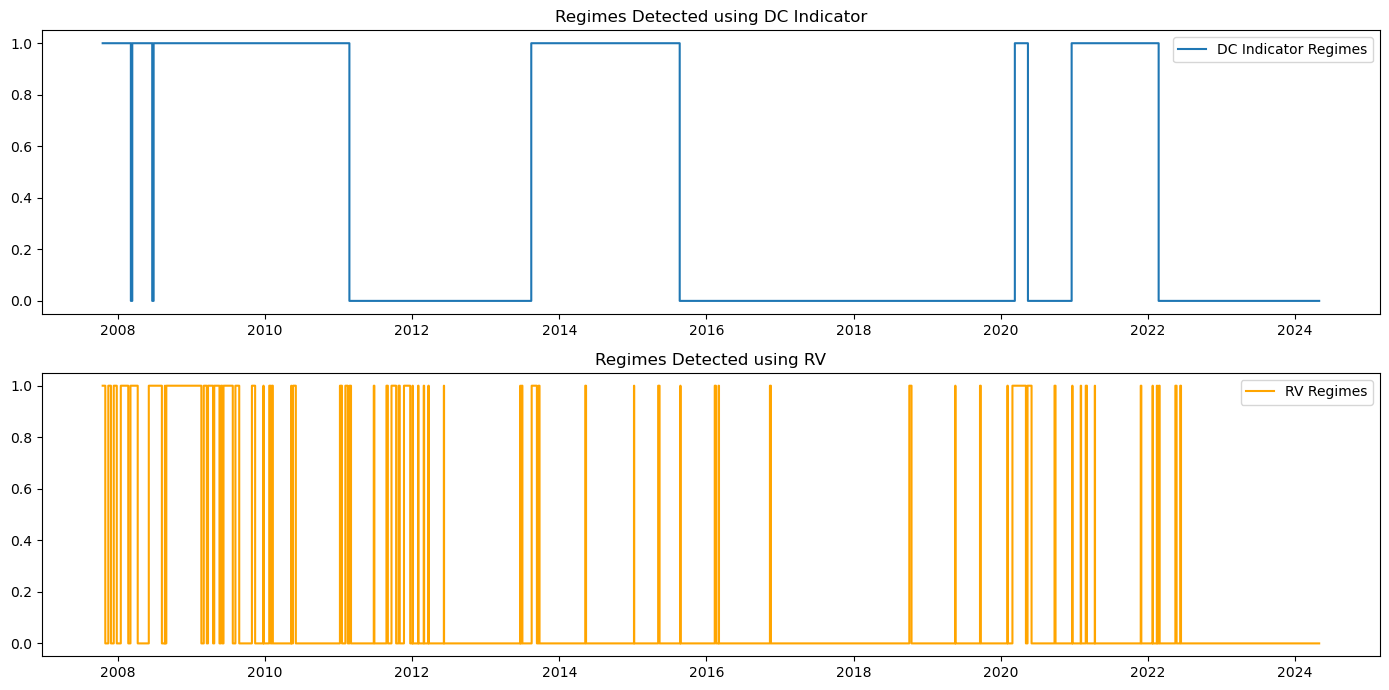

In [6]:
Plotting.plot_regimes(dc_dates, dc_states, rv_states)


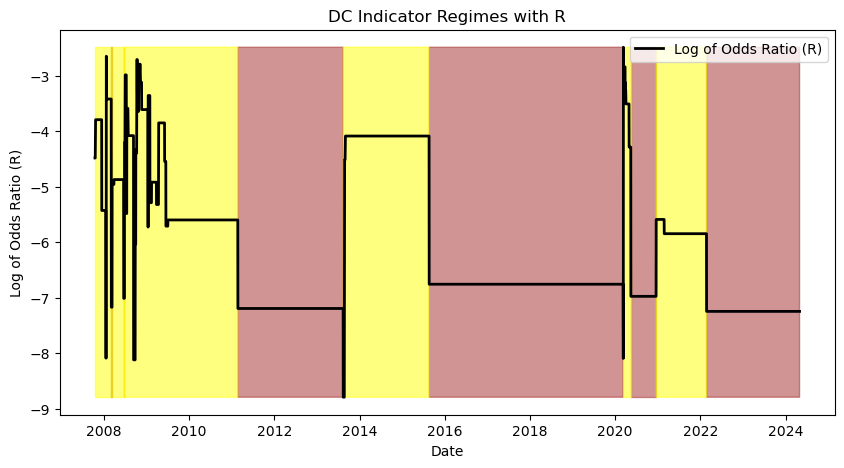

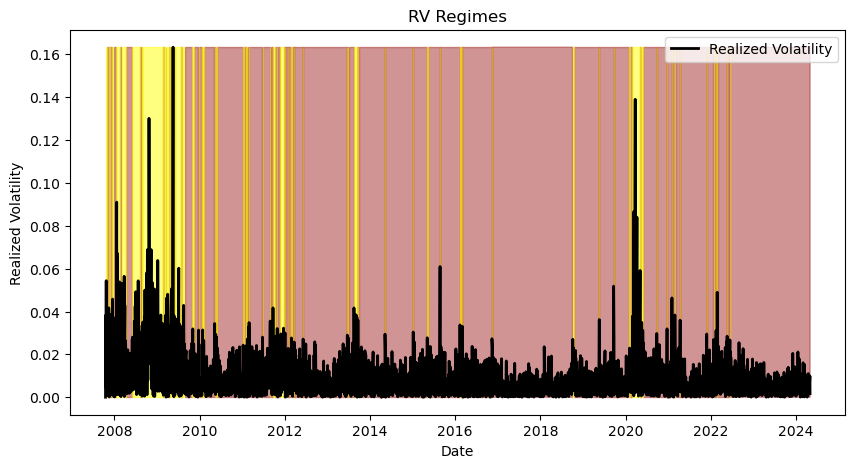

In [7]:
# Colors for regimes
colors = {0: 'brown', 1: 'yellow'}

# Plot for DC indicator using LOR
Plotting.plot_with_regime_background(data, 'R', dc_states, 
                            'DC Indicator Regimes with R', 'Log of Odds Ratio (R)', colors)

# Plot for Realized Volatility 'RV'
Plotting.plot_with_regime_background(data, 'RV', rv_states, 
                            'RV Regimes', 'Realized Volatility', colors)


In [8]:
# Assuming 'dc_states' are the regimes detected for the DC indicator and 'dc_dates' are the corresponding dates
dc_regime_dates = get_regime_dates.get_regime_dates(data.index, dc_states)

# Print the regime dates for DC indicator
for regime in dc_regime_dates:
    print(f"Regime {regime[0]}: From {regime[1]} to {regime[2]}")


Regime 1: From 2007-10-17 00:00:00 to 2008-03-04 00:00:00
Regime 0: From 2008-03-05 00:00:00 to 2008-03-11 00:00:00
Regime 1: From 2008-03-12 00:00:00 to 2008-06-18 00:00:00
Regime 0: From 2008-06-19 00:00:00 to 2008-06-25 00:00:00
Regime 1: From 2008-06-26 00:00:00 to 2011-02-22 00:00:00
Regime 0: From 2011-02-23 00:00:00 to 2013-08-13 00:00:00
Regime 1: From 2013-08-14 00:00:00 to 2015-08-20 00:00:00
Regime 0: From 2015-08-21 00:00:00 to 2020-03-09 00:00:00
Regime 1: From 2020-03-11 00:00:00 to 2020-05-14 00:00:00
Regime 0: From 2020-05-15 00:00:00 to 2020-12-17 00:00:00
Regime 1: From 2020-12-18 00:00:00 to 2022-02-22 00:00:00
Regime 0: From 2022-02-23 00:00:00 to 2024-04-30 00:00:00


In [9]:
from sklearn.preprocessing import MinMaxScaler

# Select the 'T' and 'TMV' columns for normalization
values_to_normalize = data[['T', 'TMV']]

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize 'T' and 'TMV' and assign back to the data DataFrame
data[['Normalized Average T', 'Normalized Average TMV']] = scaler.fit_transform(values_to_normalize)

# Now you can use 'Normalized Average T' and 'Normalized Average TMV' for plotting


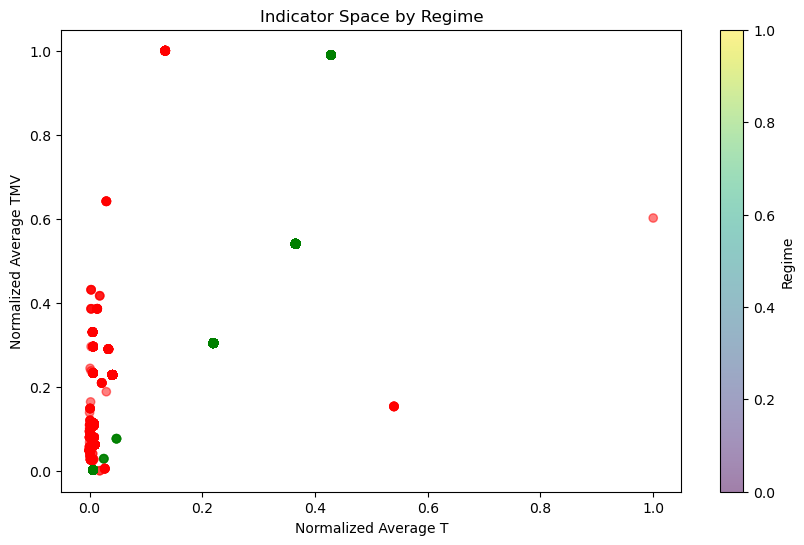

In [10]:
# Assuming dc_states contains the regime classification
data['Regime'] = dc_states

# Plotting
plt.figure(figsize=(10, 6))
colors = {0: 'green', 1: 'red'}  # Assuming two regimes for simplicity, adjust as needed

# Create scatter plot
plt.scatter(data['Normalized Average T'], data['Normalized Average TMV'], 
            c=data['Regime'].map(colors), alpha=0.5)

# Labeling the plot
plt.xlabel('Normalized Average T')
plt.ylabel('Normalized Average TMV')
plt.title('Indicator Space by Regime')
plt.colorbar(label='Regime')  # Show color scale
plt.show()
